<h1>Questions to be handed in for project 6b:</h1>

<p>Read about this material here: <a href="http://mth229.github.io/symbolic.html">Symbolic math in Julia</a>.</p>

<p>Begin by loading our package for plotting <em>and</em> a new package that allows symbolic math:</p>

In [ ]:
using Plots; gadfly
using SymPy

<hr />

<h3>Quick background <small>Read the notes for more detail</small></h3>

<p>There are many computer algebra systems (CAS) that do symbolic math. Most students are familiar with Wolfram's <a href="http://www.wolframalpha.com/">alpha</a> site, as many homework problems can be easily done there. That site  uses Wolfram's <code>Mathematica</code> program, though the interface relaxes greatly the syntax of that program. Other CASs include <code>Maple</code> and <code>Sage</code>. Both <code>Mathematica</code> and <code>Maple</code> are available for free to CUNY students and <code>Sage</code> is free to everyone, as it is open source.</p>

<p>In addition to these, there is <code>SymPy</code>, an add-on to the popular <code>Python</code> programming language. Julia's <code>SymPy</code> package interfaces with <code>Python&#39;s</code> <code>SymPy</code> package in a fairly easy to use manner.</p>

<p>The first thing one does is create some symbolic variables:</p>

In [ ]:
x, y, z, h = symbols("x, y, z, h")

(x,y,z,h)

<p>(This can also be done with just <code>&#64;vars x y z h</code></p>

<p>That command creates symbolic variables that (more or less) magically interact with <code>Julia</code> functions. So for example, we can create a symbolic expression as follows:</p>

In [ ]:
p = 16x^2 - 96x + 128

<p>Note a subtle but <em>big</em> difference: we did not define a function, rather <code>p</code> is an expression. (A function would be <code>p&#40;x&#41; &#61; ...</code>). Symbolic expressions print slightly differently than functions, so this can be a clue. Also note that we _could_ have defined a function, then evaluated it on the symbolic value of $x$:</p>

In [ ]:
q(x) = 16x^2 - 96x + 128	# a function
q(2)				# used as any other function call
q(x)				# evaluating with a symbolic value gives expression

<p>What is so great about symbolic expressions? Well, they can be manipulated symbolically!</p>

<p>For example to _factor_ the polynomial <code>p</code> we have the <code>factor</code> function:</p>

In [ ]:
factor(p)

<p>Or if we used a function:</p>

In [ ]:
factor(q(x))

<p>(<code>factor</code> applied to a symbolic expression tries to factor as a polynomial, say; whereas <code>factor</code> applied to an integer tries to find prime factors. The <code>factor</code> function is generic, so can have different implementations depending on the type of its argument.)</p>

<p>To solve for <code>p&#61;0</code> we have <code>solve</code>:</p>

In [ ]:
solve(p, x)			# or just solve(p) as x can be implied

<p>The two answers are $2$ and $4$, as one could read from the factorization of <code>p</code>. The <code>solve</code> function tries to solve when the expression is equal to $0$. To solve something of the type $g(x) = h(x)$, use $g(x) - h(x) = 0$, as is done with <code>fzero</code>, our numeric solver.</p>

<p>Symbolic expressions are not functions, but they can often be called like functions. In the simplest case – with just one free symbol, the notation is similar:</p>

In [ ]:
ex = x^2 - 2x + 2
ex(2)

<p>For expressions with one or more variable, then an indication must be made as to which variable gets which value. There are a few ways to do this, but using <code>&#61;&gt;</code> might be the most direct:</p>

In [ ]:
ex = x^2 - y^2 - 1
ex(x=>2, y=>3)

<p>The use of <code>&#40;&#41;</code> to substitute a value is only valid for version <code>0.4</code> or greater. This is just a convenient interface for <code>subs</code> to substitute a value into a expression. The syntax for that is: <code>subs&#40;ex, &#40;x,xvalue&#41;, &#40;y, yvalue&#41;, ...&#41;</code>. So, we could have done:</p>

In [ ]:
ex = x^2 - y^2 - 1
subs(ex, (x,2), (y,3))

<h3>Questions</h3>

<h4>Working with algebraic expressions</h4>

<p>Algebra functions include <code>expand</code> to expand a polynomial expression, <code>simplify</code> to simplify algebraically an expression, <code>together</code> to combine expressions, and <code>factor</code> to factor expressions.</p>

<ul>
<li>Factor the polynomial $p(x) = -2x^4 - x^3 + 3x^2$</li>
</ul>

<ul>
<li>Find the zeros and any vertical asymptotes of the rational function</li>
</ul>


$$
f(x) = \frac{x^3 + 3x^2}{x^2 - x  - 6}
$$


<p>(Use <code>factor</code> to get the factors, then read these values off.)</p>

<ul>
<li>Factor the polynomial $p(x) = 4x^4 + 2x^3 - 2x^2 -3x - 1$. How many roots are there? How many real roots are there? </li>
</ul>

<ul>
<li>Solve the equation $x^4 - 8x^2 + 8 = 0$. How many real roots are there?</li>
</ul>

<ul>
<li>Simplify</li>
</ul>


$$
\frac{\frac{1}{x+h} - \frac{1}{x}}{h}
$$


<p>From your simplified answer, what would be the value if $h=0$?</p>

<h4>Performing limits</h4>

<p>The <code>limit</code> function from <code>SymPy</code> implements <a href="http://docs.sympy.org/dev-py3k/_modules/sympy/series/gruntz.html">Gruntz's algorithm</a> to find symbolic derivatives. It does not have the issues with floating point that a numeric approach does.</p>

<p>The basic form is <code>limit&#40;expr, x, c&#41;</code>, where <code>x</code> is the symbolic variable and <code>c</code> is where the limit is being taken. Optionally one can include <code>dir&#61;&quot;&#43;&quot;</code> or <code>dir&#61;&quot;-&quot;</code> to find limits from the right or left. For example, the right limit at $c=0$ of $x^x$ is given by:</p>

In [ ]:
limit(x^x, x, 0, dir="+")

<ul>
<li>Symbolically find </li>
</ul>


$$
\lim_{x \rightarrow 0} \frac{3^x - 1}{x}
$$


<ul>
<li>Symbolically find </li>
</ul>


$$
\lim_{x \rightarrow 0+} (1 + 3x)^{1/x}
$$


<ul>
<li>Symbolically find </li>
</ul>


$$
\lim_{x \rightarrow 1} \frac{x^n - 1}{x^m - 1}
$$


<p>You can define $m$ and $n$ as symbols and your answer will include them:</p>

In [ ]:
m,n = symbols("m, n")

(m,n)

<ul>
<li>Symbolically find </li>
</ul>


$$
\lim_{x \rightarrow \infty} (\frac{x}{x+1})^x
$$


<p>Limits at infinity just need <code>c&#61;oo</code> (oh-oh, not zero-zero).</p>

<ul>
<li>What is the value of this expression and does it make sense?</li>
</ul>

In [ ]:
f(x) = sin(x)
ex = (f(x + h) - f(x)) / h
limit(ex, h, 0)

<h4>Questions: Finding derivatives</h4>

<p><code>SymPy</code> provides the <code>diff</code> function for finding derivatives: <code>diff&#40;ex, x&#41;</code> will find the derivative in <code>x</code>, whereas <code>diff&#40;ex, x, 2&#41;</code> will find the second derivative. For example, here we see the chain rule in action:</p>

In [ ]:
f(x) = sin(exp(x))
diff(f(x), x)

<p>(Just to be clear, the <code>D</code> function from the <code>Roots</code> package was <code>D&#40;f&#41;</code> which creates a function. Here we use <code>f&#40;x&#41;</code> which creates a symbolic expression. It is an important distinction, <code>diff&#40;f,x&#41;</code> will not work, as desired.)</p>

<ul>
<li>What is the derivative of $f(x) = \sin(x) / (\tan^{-1}(x) + \tan^2(x))$?</li>
</ul>

<ul>
<li>What is the derivative of </li>
</ul>


$$
f(x) = \frac{1}{\sqrt(2\pi)} e^{-x^2/2}?
$$


<ul>
<li>Find the second derivative of $f(x) = \tan^{-1}(x)$.</li>
</ul>

<ul>
<li>Find the 10th derivative of $f(x) = xe^{-x}$.</li>
</ul>

<ul>
<li>Does this limit give the first derivative? Check that it does or doesn't for $f(x) = \sin(x)$.</li>
</ul>


$$
\lim_{h \rightarrow 0} \frac{f(x + h) - f(x-h)}{h}.
$$


<ul>
<li>Does this limit give the second derivative? Check that it does or doesn't for $f(x) = \sin(x)$.</li>
</ul>


$$
\lim_{h \rightarrow 0} \frac{f(x + h) - 2f(x) + f(x-h)}{h^2}.
$$


<ul>
<li>Find the critical points of $f(x) = 3x^4−32x^3+114x^2−144x + 2$ by solving for when the derivative is $0$.</li>
</ul>

<ul>
<li>Find the inflection points of $f(x) = e^{-x^2}$</li>
</ul>

<ul>
<li>For the function $\sin(x)$ over the interval $[0, \pi/2]$ find a point $c$ such that the slope of the tangent line at $c$ is equal to the slope of the secant line from $0$ to $\pi/2$.</li>
</ul>

<h3>Graphing expressions</h3>

<p>The <code>plot</code> function is overloaded to also plot symbolic expressions of a single variable. The use is not so different than how it is used to plot a function:</p>

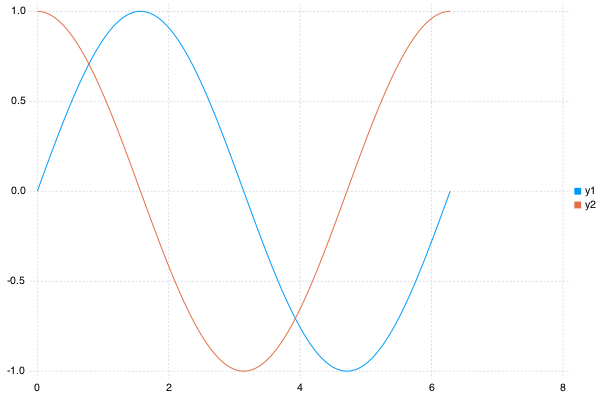

In [ ]:
plot([sin(x), cos(x)], 0, 2pi)

<p>The difference is we plot the expressions <code>sin&#40;x&#41;</code> and <code>cos&#40;x&#41;</code> rather than <em>function objects</em> <code>sin</code> and <code>cos</code>.</p>

<ul>
<li>Graphically solve for when $f(x) = e^x$ and $g(x) = 10 + 5x$ intersect for $x > 0$.</li>
</ul>

<ul>
<li>For the function $f(x) = e^x$. Over the interval $[0,3]$, plot both $f(x)$ and the expression </li>
</ul>


$$
f(0) + \frac{f'(0)}{1!} x + \frac{f''(0)}{2!}x^2.
$$


<p>Where $n!=n \cdot (n-1) \cdots 2 \cdot 1$, and can be evaluated with <code>factorial&#40;2&#41;</code>. Do the two mostly agree on this interval?</p>

<p>(One tedious aspect of finding $f'(a)$ is that it is done in two steps like <code>replace&#40;diff&#40;f, x&#41;, x, a&#41;</code> (find the derivative in <code>x</code>, the replace <code>x</code> with <code>a</code>). The following function can shorten the above so that <code>D&#40;f,k&#41;&#40;a&#41;</code> works on symbolic expression, as it did for functions with <code>D</code> from the <code>Roots</code> package.)</p>

In [ ]:
D(f, k=1) = a -> replace(diff(f(x), x, k), x, a)

D (generic function with 2 methods)

<h4>Questions: Integration</h4>

<p>The <code>integrate</code> function can be used for integration – when an antiderivative exists. Integration comes in two flavors</p>

<ul>
<li>indefinite integrals (or basically antiderivatives)</li>
</ul>

<ul>
<li>definite integrals. </li>
</ul>

<p>The two are related, as the definite integral $\int_a^b f(x) dx = F(b) - F(a)$ where $F(x)$ is <em>any</em> antiderivative (they all differ by atmost a constant).</p>

<p>In <code>SymPy</code>, we simply pass in a symbolic expression and optionally limits of integration:</p>

In [ ]:
integrate(x*exp(-x))		# indefinite integral

<p>or </p>

In [ ]:
integrate(x*exp(-x), (x, 0, 10))	# definite

<p>The limits of integration are lumped together as a tuple of the form <code>&#40;symbol, a, b&#41;</code>, this syntax allows for multiple integration.</p>

<h4>Questions</h4>

<ul>
<li>Find an antiderivative of  $\sin(x) \cdot \cos(2x)$.</li>
</ul>

<ul>
<li>Find the area under the curve of $\sin(x)$ bewteen $0$ and $\pi$.</li>
</ul>

<ul>
<li>If you use a symbolic variable for the limits of integration the answer can be expressed that way. Find</li>
</ul>


$$
\int_0^t x \cdot \exp(-x) dx
$$


<p>Then differentiate it to confirm that the fundamental theorem of calculus holds.</p>

<ul>
<li>The mean value theorem for integrals states that there exists a $c$ in $[a,b]$ for which </li>
</ul>


$$
f(c) = (b-a)^{-1} \int_a^b f(x) dx
$$


<p>For $f(x) = 10e^{-5t}$ find a $c$ in the interval $[0,1]$.</p>